In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm
import torch
import wandb
sns.set_style("whitegrid")

In [3]:
titlesize=15
fontsize=12
imgsize=6

In [4]:
sweep = wandb.Api().sweep("badboyz2000/primal_dual_mi/q73jfc83")#mfederici/primal_dual_mi/mgzvgoaa")

In [5]:
results = []

predictor_key = 'model.mi_estimator.predictor'
proposal_key = 'model.mi_estimator.proposal'
result_key = 'I(x;y)/train/value_epoch'
result_1_key = 'I_pr(x;y)/train/value_epoch'
result_2_key = 'KL_f(p||r)/train/value_epoch'
var_key = 'I(x;y)/train/value_variance'
for run in tqdm(sweep.runs):
    if result_key in run.summary:
        predictor = len(run.config[predictor_key]) > 0
        proposal = len(run.config[proposal_key]) > 0
        estimator = run.config['model.mi_estimator'].split("/")[-1].split('.')[0]
        mi = run.summary[result_key]
        mi_pr = run.summary[result_1_key]
        mi_f = run.summary[result_2_key]
        var = run.summary[var_key]
        results.append({
            "predictor": predictor,
            "proposal": proposal,
            "estimator": estimator,
            "var": var,
            "I(x;y)": mi,
            "I_pr(x;y)": mi_pr,
            "KL_f(p||r)": mi_f,
            "run": run
        })
    else:
        print("failed run", run)

  0%|          | 0/84 [00:00<?, ?it/s]

failed run <Run badboyz2000/primal_dual_mi/ectj3qz1 (failed)>
failed run <Run badboyz2000/primal_dual_mi/yhied3gi (failed)>
failed run <Run badboyz2000/primal_dual_mi/7hkwsv7s (failed)>
failed run <Run badboyz2000/primal_dual_mi/9ueq2gir (failed)>
failed run <Run badboyz2000/primal_dual_mi/o47l98eh (failed)>
failed run <Run badboyz2000/primal_dual_mi/m9fd0bj3 (failed)>
failed run <Run badboyz2000/primal_dual_mi/au58wz81 (failed)>
failed run <Run badboyz2000/primal_dual_mi/adeckzxy (failed)>
failed run <Run badboyz2000/primal_dual_mi/ifiw5pc6 (failed)>
failed run <Run badboyz2000/primal_dual_mi/2nkkrgd7 (failed)>
failed run <Run badboyz2000/primal_dual_mi/hlq609r7 (failed)>
failed run <Run badboyz2000/primal_dual_mi/piux37ki (failed)>
failed run <Run badboyz2000/primal_dual_mi/k5ab1run (failed)>
failed run <Run badboyz2000/primal_dual_mi/9sby88xv (failed)>
failed run <Run badboyz2000/primal_dual_mi/89299aq8 (failed)>
failed run <Run badboyz2000/primal_dual_mi/j8exc05z (failed)>
failed r

In [6]:
run.summary

{'I(x;y)/train/value_epoch': 5.508290767669678, 'I_pr(x;y)/train/value_epoch': 0, 'KL_f(p||r)/train/value_epoch': 5.508290767669678, 'I(x;y)/train/value_variance': 5.071408855099146, 'I(x;y)/train/grad_step': 5.833486557006836, 'I(x;y)/train/grad_epoch': 5.508290767669678, 'I(x;y)/train/value_step': 5.833486557006836, 'I_pr(x;y)/train/grad_step': 0, 'KL_f(p||r)/train/grad_step': 5.833486557006836, '_runtime': 1100.32670879364, 'trainer/global_step': 78199, 'KL_f(p||r)/train/grad_epoch': 5.508290767669678, 'KL_f(p||r)/train/value_step': 5.833486557006836, '_timestamp': 1672249828.3235035, '_wandb': {'runtime': 1102}, 'I(x;y)/train/grad_variance': 5.071408855099146, 'I_pr(x;y)/train/value_step': 0, '_step': 1663, 'I_pr(x;y)/train/grad_epoch': 0, 'epoch': 99}

In [7]:
results = pd.DataFrame(results)
results

,predictor,proposal,estimator,var,I(x;y),I_pr(x;y),KL_f(p||r),run
0,True,False,TUBA_alpha,0.026786,4.123965,3.464637,0.659339,<Run badboyz2000/primal_dual_mi/6nbhatl2 (fini...
1,True,False,TUBA_alpha,0.063021,4.121440,3.465107,0.656341,<Run badboyz2000/primal_dual_mi/xrh924rz (fini...
2,True,False,TUBA_alpha,0.008622,4.157834,3.465104,0.692737,<Run badboyz2000/primal_dual_mi/x4qothr1 (fini...
3,False,True,TUBA_alpha,0.013603,4.587040,4.587066,-0.000029,<Run badboyz2000/primal_dual_mi/xkc33noz (fini...
4,False,True,TUBA_alpha,0.013664,4.595729,4.595750,-0.000025,<Run badboyz2000/primal_dual_mi/xlbacz49 (fini...
...,...,...,...,...,...,...,...,...
58,False,True,NWJ,0.153441,6.581009,4.583455,1.997554,<Run badboyz2000/primal_dual_mi/7phg83gu (fini...
59,False,True,NWJ,0.181966,6.553374,4.589197,1.964175,<Run badboyz2000/primal_dual_mi/fhmxttoa (fini...
60,False,False,NWJ,4.364555,5.461354,0.000000,5.461354,<Run badboyz2000/primal_dual_mi/xycbp3pt (fini...
61,False,False,NWJ,4.501224,5.411723,0.000000,5.411723,<Run badboyz2000/primal_dual_mi/jzprkha1 (fini...


[Text(0, 0, 'TUBA_alpha'),
 Text(0, 0, 'TUBA'),
 Text(0, 0, 'SMILE'),
 Text(0, 0, 'InfoNCE'),
 Text(0, 0, 'JS'),
 Text(0, 0, 'MINE'),
 Text(0, 0, 'NWJ')]

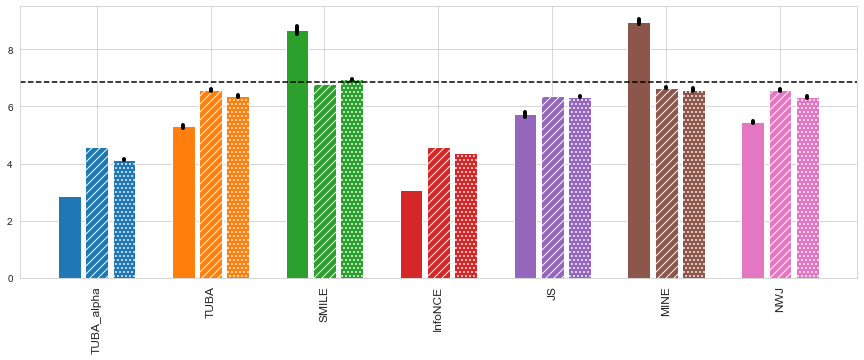

In [8]:
f, ax = plt.subplots(1,1, figsize=(15,5))

models = results["estimator"].unique()



delta_models = 2.5
bar_width= 0.5
bar_spacing = 0.1

true_mi = 6.8526


for i, estimator in enumerate(models):
    # No proposal
    results_1 = results[(results["predictor"]==False) & (results["proposal"]==False)]
    results_1 = results_1[results_1["estimator"]==estimator]

    mi = results_1['I(x;y)'].mean()
    std = results_1['I(x;y)'].std()

    x = [
        i*delta_models-bar_width-bar_spacing,
        i*delta_models,
        i*delta_models+bar_width+bar_spacing,
    ]

    plot = ax.bar(x[0], mi, width=bar_width)
    ax.plot([x[0], x[0]], [mi-std, mi+std], color='k', linewidth=4)
    color = plot[-1].get_facecolor()


    # Variational proposal
    results_1 = results[(results["predictor"]==False) & (results["proposal"]==True)]
    results_1 = results_1[results_1["estimator"]==estimator]
    mi = results_1['I(x;y)'].mean()
    std = results_1['I(x;y)'].std()
    ax.bar([x[1], x[1]], mi, color=color, width=bar_width, hatch='///')
    ax.plot([x[1], x[1]], [mi-std, mi+std], color='k', linewidth=4)

    # Attribute proposal
    results_1 = results[(results["predictor"]==True) & (results["proposal"]==False)]
    results_1 = results_1[results_1["estimator"]==estimator]
    mi = results_1['I(x;y)'].mean()
    std = results_1['I(x;y)'].std()
    ax.bar([x[2], x[2]], mi, color=color, width=bar_width, hatch='...')
    ax.plot([x[2], x[2]], [mi-std, mi+std], color='k', linewidth=4)

ax.set_xticks(np.arange(len(models))*delta_models)
ax.set_xticklabels(models, rotation=90, fontsize=fontsize)


Text(0.5, 1.0, 'Variance')

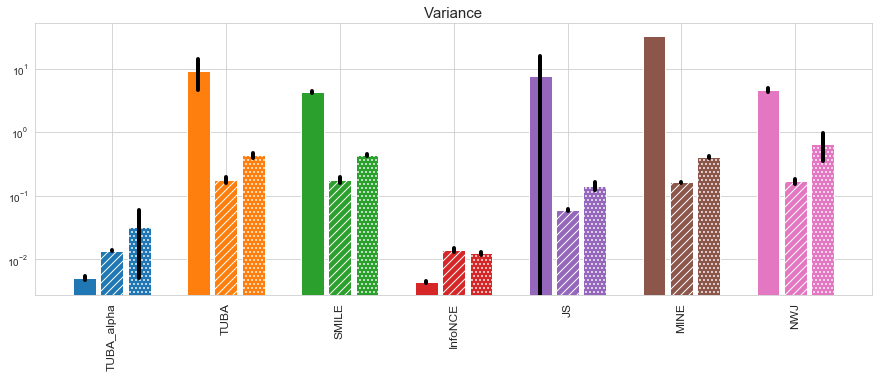

In [12]:
f, ax = plt.subplots(1,1, figsize=(15,5))

models = results["estimator"].unique()



delta_models = 2.5
bar_width= 0.5
bar_spacing = 0.1

key = "var"


for i, estimator in enumerate(models):
    # No proposal
    results_1 = results[(results["predictor"]==False) & (results["proposal"]==False)]
    results_1 = results_1[results_1["estimator"]==estimator]

    mi = results_1[key].mean()
    std = results_1[key].std()

    x = [
        i*delta_models-bar_width-bar_spacing,
        i*delta_models,
        i*delta_models+bar_width+bar_spacing,
    ]

    plot = ax.bar(x[0], mi, width=bar_width)
    ax.plot([x[0], x[0]], [mi-std, mi+std], color='k', linewidth=4)
    color = plot[-1].get_facecolor()


    # Variational proposal
    results_1 = results[(results["predictor"]==False) & (results["proposal"]==True)]
    results_1 = results_1[results_1["estimator"]==estimator]
    mi = results_1[key].mean()
    std = results_1[key].std()
    ax.bar([x[1], x[1]], mi, color=color, width=bar_width, hatch='///')
    ax.plot([x[1], x[1]], [mi-std, mi+std], color='k', linewidth=4)

    # Attribute proposal
    results_1 = results[(results["predictor"]==True) & (results["proposal"]==False)]
    results_1 = results_1[results_1["estimator"]==estimator]
    mi = results_1[key].mean()
    std = results_1[key].std()
    ax.bar([x[2], x[2]], mi, color=color, width=bar_width, hatch='...')
    ax.plot([x[2], x[2]], [mi-std, mi+std], color='k', linewidth=4)

ax.set_xticks(np.arange(len(models))*delta_models)
ax.set_xticklabels(models, rotation=90, fontsize=fontsize)
ax.set_yscale("log")

ax.set_title("Variance", fontsize=titlesize)

Text(0.5, 1.0, 'Bias')

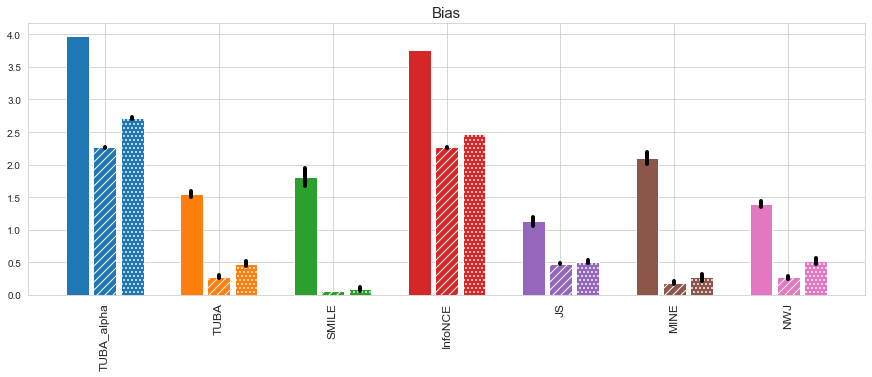

In [13]:
f, ax = plt.subplots(1,1, figsize=(15,5))

models = results["estimator"].unique()



delta_models = 2.5
bar_width= 0.5
bar_spacing = 0.1


for i, estimator in enumerate(models):
    # No proposal
    results_1 = results[(results["predictor"]==False) & (results["proposal"]==False)]
    results_1 = results_1[results_1["estimator"]==estimator]

    mi = np.abs(true_mi-results_1['I(x;y)'].mean())
    std = results_1['I(x;y)'].std()

    x = [
        i*delta_models-bar_width-bar_spacing,
        i*delta_models,
        i*delta_models+bar_width+bar_spacing,
    ]

    plot = ax.bar(x[0], mi, width=bar_width)
    ax.plot([x[0], x[0]], [mi-std, mi+std], color='k', linewidth=4)
    color = plot[-1].get_facecolor()


    # Variational proposal
    results_1 = results[(results["predictor"]==False) & (results["proposal"]==True)]
    results_1 = results_1[results_1["estimator"]==estimator]
    mi = np.abs(true_mi-results_1['I(x;y)'].mean())
    std = results_1['I(x;y)'].std()
    ax.bar([x[1], x[1]], mi, color=color, width=bar_width, hatch='///')
    ax.plot([x[1], x[1]], [mi-std, mi+std], color='k', linewidth=4)

    # Attribute proposal
    results_1 = results[(results["predictor"]==True) & (results["proposal"]==False)]
    results_1 = results_1[results_1["estimator"]==estimator]
    mi = np.abs(true_mi-results_1['I(x;y)'].mean())
    std = results_1['I(x;y)'].std()
    ax.bar([x[2], x[2]], mi, color=color, width=bar_width, hatch='...')
    ax.plot([x[2], x[2]], [mi-std, mi+std], color='k', linewidth=4)

ax.set_xticks(np.arange(len(models))*delta_models)
ax.set_xticklabels(models, rotation=90, fontsize=fontsize)
ax.set_title("Bias", fontsize=titlesize)

0it [00:00, ?it/s]

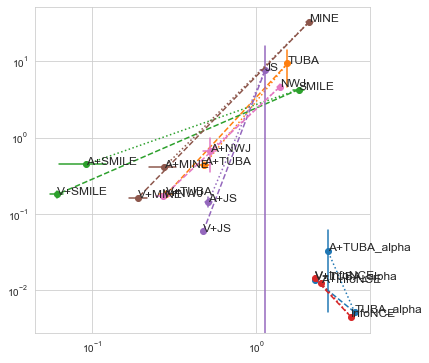

In [9]:
f, ax = plt.subplots(1,1, figsize=(6,6))

models = results["estimator"].unique()


true_mi = 6.8526

delta_models = 2.5
bar_width= 0.5
bar_spacing = 0.1


for i, estimator in tqdm(enumerate(models)):
    # No proposal
    results_1 = results[(results["predictor"]==False) & (results["proposal"]==False)]
    results_1 = results_1[results_1["estimator"]==estimator]

    biases = []
    vars = []

    mi = results_1['I(x;y)'].mean()
    bias = np.abs(true_mi-mi)
    bias_std = results_1['I(x;y)'].std()
    biases.append(bias)

    var = results_1['var'].mean()
    vars.append(var)
    var_std = results_1['var'].std()

    p = plt.plot(bias, var, 'o')
    plt.text(bias, var, estimator, fontsize=fontsize)
    c = p[-1].get_color()
    plt.plot([bias, bias], [var-var_std, var+var_std], '-', color=c)
    plt.plot([bias-bias_std, bias+bias_std], [var, var], '-', color=c)

    # No proposal
    results_1 = results[(results["predictor"]==False) & (results["proposal"]==True)]
    results_1 = results_1[results_1["estimator"]==estimator]

    mi = results_1['I(x;y)'].mean()
    bias = np.abs(true_mi-mi)
    biases.append(bias)
    bias_std = results_1['I(x;y)'].std()

    var = results_1['var'].mean()
    vars.append(var)
    var_std = results_1['var'].std()

    plt.plot(bias, var, 'o', color=c)
    plt.plot([bias, bias], [var-var_std, var+var_std], '-', color=c)
    plt.plot([bias-bias_std, bias+bias_std], [var, var], '-', color=c)
    plt.text(bias, var, "V+"+estimator, fontsize=fontsize)

    # No proposal
    results_1 = results[(results["predictor"]==True) & (results["proposal"]==False)]
    results_1 = results_1[results_1["estimator"]==estimator]

    mi = results_1['I(x;y)'].mean()
    bias = np.abs(true_mi-mi)
    biases.append(bias)
    bias_std = results_1['I(x;y)'].std()

    var = results_1['var'].mean()
    vars.append(var)
    var_std = results_1['var'].std()

    plt.plot(bias, var, 'o', color=c)
    plt.plot([bias, bias], [var-var_std, var+var_std], '-', color=c)
    plt.plot([bias-bias_std, bias+bias_std], [var, var], '-', color=c)
    plt.text(bias, var, "A+"+estimator, fontsize=fontsize)

    plt.plot([biases[0], biases[1]], [vars[0], vars[1]], color=c, ls='--')
    plt.plot([biases[0], biases[2]], [vars[0], vars[2]], color=c, ls=':')

ax.set_yscale("log")
ax.set_xscale("log")


In [39]:

for entry in run.scan_history(keys=["I(x;y)/train/value_step", "epoch"], min_step=1646):
    print(entry)
    break

{'I(x;y)/train/value_step': 2.1424102783203125, 'epoch': 99}


In [53]:
std = pd.DataFrame(run.scan_history(keys=["I(x;y)/train/value_step"], min_step=1646)).std().values[0]

In [59]:
run.config['fit.model.init_args.mi_estimator.__path__']

'/home/marco/Documents/primal_dual_mi/config/components/models/mi_estimators/NWJ.yaml'

In [21]:
run.config['fit.model.init_args.mi_estimator.__path__'].split("/")[-1].split('.')[0]

'NWJ'